In [30]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.distributions.empirical_distribution import ECDF
import math as m
from bisect import bisect
from scipy.interpolate import CubicSpline
from scipy.stats import betaprime 

Так как таблицу уровней значимости для критериев Фросини и Андерсона - Дарлинга удалось найти лишь для значений $\alpha=0.01,\ 0.05,\ 0.1,\ 0.15,\ 0.2$ в книге Б. Ю. Лемешко и П. Ю. Блинова "Критерии проверки отклонения распределения от равномерного закона", Новосибирск: НГТУ, 2015, то мы их нашли численным моделированием. В скобках приведены данные из книги. 

In [31]:
def fros(alpha,n,sim):
    x1=np.random.rand(sim,n)
    s1=[]
    B1=[]
    #print(x1)
    for i in range(0,sim):
        x1[i,:].sort()
        #print(x1[i])
        s1.append([])
        for k in range(0,n):
            s1[i].append(abs(x1[i,k]-(k+0.5)/n))
        #print(s1[i])
        B1.append(pow(n,-0.5)*sum(s1[i]))
    return np.percentile(B1, alpha)
def andersond(alpha,n,sim):
    x1=np.random.rand(sim,n)
    s1=[]
    B1=[]
    #print(x1)
    for i in range(0,sim):
        x1[i,:].sort()
        #print(x1[i])
        s1.append([])
        for k in range(0,n):
            s1[i].append((2*(k+1)-1)*m.log(x1[i,k],m.e)/(2*n)+(1-(2*k+1)/(2*n))*m.log(1-x1[i,k],m.e))
        #print(s1[i])
        B1.append(-n-2*sum(s1[i]))
    return np.percentile(B1, alpha)

In [32]:
N2=4000
f005=fros(99.5,20,N2)
f01=fros(99,20,N2)
f025=fros(97.5,20,N2)
f05=fros(95,20,N2)
f1=fros(90,20,N2)
f15=fros(85,20,N2)
f2=fros(80,20,N2)
f3=fros(70,20,N2)
f4=fros(60,20,N2)
a005=andersond(99.5,20,N2)
a01=andersond(99,20,N2)
a025=andersond(97.5,20,N2)
a05=andersond(95,20,N2)
a1=andersond(90,20,N2)
a15=andersond(85,20,N2)
a2=andersond(80,20,N2)
a3=andersond(70,20,N2)
a4=andersond(60,20,N2)
print('                 Table of the values of criterias ')
print('\nalpha   0.005   0.01   0.025    0.05    0.1      0.15     0.2    0.3    0.4\n')
print('Frosini %1.3f  %1.3f   %1.3f    %1.3f    %1.3f   %1.3f   %1.3f  %1.3f  %1.3f'%(f005, f01, f025, f05, f1, f15, f2, f3, f4))
print('Frosini       (0.7428)        (0.5785) (0.4966) (0.4456) (0.4083)')
print('And-Dar %1.3f  %1.3f   %1.3f    %1.3f    %1.3f   %1.3f   %1.3f  %1.3f  %1.3f'%(a005, a01, a025, a05, a1, a15, a2, a3, a4))
print('And-Dar      (3.8781) (3.0775) (2.4924) (1.9330) (1.6212)')
#ecdf = ECDF(fros(20,1000))
#plt.step(ecdf.x, ecdf.y) 

                 Table of the values of criterias 

alpha   0.005   0.01   0.025    0.05    0.1      0.15     0.2    0.3    0.4

Frosini 0.836  0.741   0.645    0.585    0.493   0.440   0.406  0.356  0.314
Frosini       (0.7428)        (0.5785) (0.4966) (0.4456) (0.4083)
And-Dar 4.339  3.954   3.085    2.428    1.924   1.640   1.470  1.107  0.946
And-Dar      (3.8781) (3.0775) (2.4924) (1.9330) (1.6212)


Напишем процедуры вычисления статистик критерия Фросини $$B=\frac{1}{\sqrt{N}}\sum_{i=1}^{N}\left| U_i-\frac{i-0.5}{N}\right|$$ и Андерсона - Дарлинга $$S=-N-2\sum_{i=1}^{N}\left( \frac{2i-1}{2N}\ln{U_i}+\left(1-\frac{2i-1}{2n}\right)\ln{(1-U_i)}\right),$$ где $U_i$ - элементы вариационного ряда, постороенного по выборке $X_1,\ldots,X_N.$

In [33]:
def frosEst(x):
   nl=len(x)
   nr=len(x[0])
   u=np.array(x)
   s=[]
   B=[]
   for i in range(0,nl):
       u[i,:].sort()
       s.append([])
       for k in range(0,nr):
           s[i].append(abs(u[i,k]-(k+0.5)/nr))
       B.append(pow(nr,-0.5)*sum(s[i]))
   return B
def andersondEst(x):
   nl=len(x)
   nr=len(x[0])
   u=np.array(x)
   s=[]
   B=[]
   for i in range(0,nl):
       u[i,:].sort()
       s.append([])
       for k in range(0,nr):
           s[i].append((2*(k+1)-1)*m.log(u[i,k],m.e)/(2*nr)+(1-(2*k+1)/(2*nr))*m.log(1-u[i,k],m.e))
       B.append(-nr-2*sum(s[i]))
   return B

Промоделируем достаточно большое число выборок из равномерного распределения и посчитаем процент, удовлетворяющих критериям $О$ и $П$ на разных уровнях значимости

In [34]:
N1=4000
x=np.random.rand(N1,20)
fx=frosEst(x)
ax=andersondEst(x)
Cr005=0
CrP005=0
Cr01=0
CrP01=0
Cr025=0
CrP025=0
Cr05=0
CrP05=0
Cr1=0
CrP1=0
Cr15=0
CrP15=0
Cr2=0
CrP2=0
Cr3=0
CrP3=0
Cr4=0
CrP4=0
for i in range(0,len(fx)):
    if (fx[i]<f005) or (ax[i]<a005):
        Cr005=Cr005+1 
    if (fx[i]<f005) and (ax[i]<a005):
        CrP005=CrP005+1
    if (fx[i]<f01) or (ax[i]<a01):
        Cr01=Cr01+1 
    if (fx[i]<f01) and (ax[i]<a01):
        CrP01=CrP01+1
    if (fx[i]<f025) or (ax[i]<a025):
        Cr025=Cr025+1 
    if (fx[i]<f025) and (ax[i]<a025):
        CrP025=CrP025+1
    if (fx[i]<f05) or (ax[i]<a05):
        Cr05=Cr05+1 
    if (fx[i]<f05) and (ax[i]<a05):
        CrP05=CrP05+1
    if (fx[i]<f1) or (ax[i]<a1):
        Cr1=Cr1+1 
    if (fx[i]<f1) and (ax[i]<a1):
        CrP1=CrP1+1
    if (fx[i]<f15) or (ax[i]<a15):
        Cr15=Cr15+1 
    if (fx[i]<f15) and (ax[i]<a15):
        CrP15=CrP15+1
    if (fx[i]<f2) or (ax[i]<a2):
        Cr2=Cr2+1 
    if (fx[i]<f2) and (ax[i]<a2):
        CrP2=CrP2+1
    if (fx[i]<f3) or (ax[i]<a3):
        Cr3=Cr3+1 
    if (fx[i]<f3) and (ax[i]<a3):
        CrP3=CrP3+1
    if (fx[i]<f4) or (ax[i]<a4):
        Cr4=Cr4+1 
    if (fx[i]<f4) and (ax[i]<a4):
        CrP4=CrP4+1
Cr005=1-Cr005/N1
Cr01=1-Cr01/N1
Cr025=1-Cr025/N1
Cr05=1-Cr05/N1
Cr1=1-Cr1/N1
Cr15=1-Cr15/N1
Cr2=1-Cr2/N1
Cr3=1-Cr3/N1
Cr4=1-Cr4/N1
CrP005=1-CrP005/N1
CrP01=1-CrP01/N1
CrP025=1-CrP025/N1
CrP05=1-CrP05/N1
CrP1=1-CrP1/N1
CrP15=1-CrP15/N1
CrP2=1-CrP2/N1
CrP3=1-CrP3/N1
CrP4=1-CrP4/N1
print('\n                   Table of significance levels')
print('\n\nalpha   0.005  0.01   0.025  0.05    0.1   0.15    0.2   0.3    0.4\n')
print('alpha O  %1.3f  %1.3f  %1.3f  %1.3f  %1.3f  %1.3f  %1.3f  %1.3f  %1.3f'%(Cr005, Cr01, Cr025, Cr05, Cr1, Cr15, Cr2, Cr3, Cr4))
print('alpha P  %1.3f  %1.3f  %1.3f  %1.3f  %1.3f  %1.3f  %1.3f  %1.3f  %1.3f'%(CrP005, CrP01, CrP025, CrP05, CrP1, CrP15, CrP2, CrP3, CrP4))


                   Table of significance levels


alpha   0.005  0.01   0.025  0.05    0.1   0.15    0.2   0.3    0.4

alpha O  0.003  0.007  0.021  0.042  0.085  0.135  0.177  0.278  0.359
alpha P  0.006  0.011  0.033  0.057  0.119  0.189  0.235  0.346  0.440


Интерполируем полученные значения и построим $\alpha = f(\alpha_{O})$

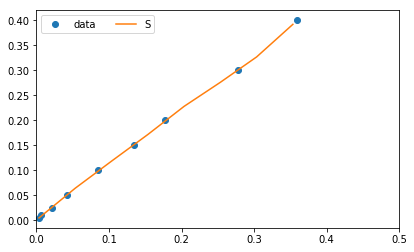

In [35]:
Alpha=[0.005,  0.01,   0.025,  0.05,    0.1,   0.15,    0.2,   0.3,   0.4]
CrArr=[Cr005, Cr01, Cr025, Cr05, Cr1, Cr15, Cr2, Cr3, Cr4]
cs = CubicSpline(CrArr, Alpha)
xs = np.arange(Cr005, Cr4, 0.05)
fig, ax = plt.subplots(figsize=(6.5, 4))
ax.plot(CrArr, Alpha, 'o', label='data')
ax.plot(xs, cs(xs), label="S")
ax.set_xlim(0, 0.5)
ax.legend(loc='upper left', ncol=2)
plt.show()

и $\alpha=f(\alpha_{П})$

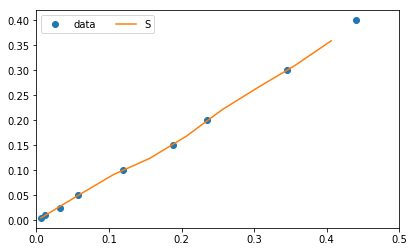

In [36]:
CrPArr=[CrP005, CrP01, CrP025, CrP05, CrP1, CrP15, CrP2, CrP3, CrP4]
csP = CubicSpline(CrPArr, Alpha)
xsP = np.arange(CrP005, CrP4, 0.05)
fig, ax = plt.subplots(figsize=(6.5, 4))
ax.plot(CrPArr, Alpha, 'o', label='data')
ax.plot(xsP, csP(xsP), label="S")
ax.set_xlim(0, 0.5)
ax.legend(loc='upper left', ncol=2)
plt.show()

Вычислим значения критериев $О$ и $П$ в точках $\alpha = 0.01,\ 0.05,\ 0.1,\ 0.15$ по полученным функциям:

In [39]:
AlphaO=cs([0.01, 0.05, 0.1, 0.15])
AlphaP=csP([0.01, 0.05, 0.1, 0.15])
print('alpha_O/P  [0.01,      0.05,      0.1,       0.15]')
print('f(alpha_O)', AlphaO)
print('f(alpha_P)', AlphaP)

alpha_O/P  [0.01,      0.05,      0.1,       0.15]
f(alpha_O) [ 0.01406444  0.06010559  0.11502299  0.16745506]
f(alpha_P) [ 0.00869123  0.04212751  0.08725126  0.11989893]


Проверим полученные значения моделированием. Сначала найдем значения критериев Фросини и Андерсона - Дарлинга в полученных $\alpha$

In [41]:
N2=4000
fAO1=fros(100*(1-AlphaO[0]),20,N2)
fAO2=fros(100*(1-AlphaO[1]),20,N2)
fAO3=fros(100*(1-AlphaO[2]),20,N2)
fAO4=fros(100*(1-AlphaO[3]),20,N2)
fAP1=fros(100*(1-AlphaP[0]),20,N2)
fAP2=fros(100*(1-AlphaP[1]),20,N2)
fAP3=fros(100*(1-AlphaP[2]),20,N2)
fAP4=fros(100*(1-AlphaP[3]),20,N2)
aAP1=andersond(100*(1-AlphaP[0]),20,N2)
aAP2=andersond(100*(1-AlphaP[1]),20,N2)
aAP3=andersond(100*(1-AlphaP[2]),20,N2)
aAP4=andersond(100*(1-AlphaP[3]),20,N2)
aAO1=andersond(100*(1-AlphaO[0]),20,N2)
aAO2=andersond(100*(1-AlphaO[1]),20,N2)
aAO3=andersond(100*(1-AlphaO[2]),20,N2)
aAO4=andersond(100*(1-AlphaO[3]),20,N2)
print('                 Table of the values of criterias ')
print('\nalpha   %1.3f    %1.3f    %1.3f    %1.3f     %1.3f   %1.3f    %1.3f    %1.3f\n'%(AlphaO[0], AlphaO[1], AlphaO[2], AlphaO[3], AlphaP[0], AlphaP[1], AlphaP[2], AlphaP[3]))
print('Frosini   %1.3f    %1.3f    %1.3f    %1.3f     %1.3f   %1.3f    %1.3f    %1.3f'%(fAO1,fAO2,fAO3,fAO4,fAP1,fAP2,fAP3,fAP4))
print('And-Dar   %1.3f    %1.3f    %1.3f    %1.3f     %1.3f   %1.3f    %1.3f    %1.3f'%(aAO1,aAO2,aAO3,aAO4,aAP1,aAP2,aAP3,aAP4))

                 Table of the values of criterias 

alpha   0.014    0.060    0.115    0.167     0.009   0.042    0.087    0.120

Frosini   0.707    0.564    0.477    0.436     0.789   0.609    0.515    0.474
And-Dar   3.598    2.278    1.816    1.538     4.042   2.643    2.072    1.763


Теперь рассчитаем значения критериев $О$ и $П$ с этими $\alpha$

In [42]:
N1=4000
x=np.random.rand(N1,20)
fx=frosEst(x)
ax=andersondEst(x)
CrAO1=0
CrPO1=0
CrAO2=0
CrPO2=0
CrAO3=0
CrPO3=0
CrAO4=0
CrPO4=0
for i in range(0,len(fx)):
    if (fx[i]<fAO1) or (ax[i]<aAO1):
        CrAO1=CrAO1+1 
    if (fx[i]<fAP1) and (ax[i]<aAP1):
        CrPO1=CrPO1+1
    if (fx[i]<fAO2) or (ax[i]<aAO2):
        CrAO2=CrAO2+1 
    if (fx[i]<fAP2) and (ax[i]<aAP2):
        CrPO2=CrPO2+1
    if (fx[i]<fAO3) or (ax[i]<aAO3):
        CrAO3=CrAO3+1 
    if (fx[i]<fAP3) and (ax[i]<aAP3):
        CrPO3=CrPO3+1
    if (fx[i]<fAO4) or (ax[i]<aAO4):
        CrAO4=CrAO4+1 
    if (fx[i]<fAP4) and (ax[i]<aAP4):
        CrPO4=CrPO4+1
CrAO1=1-CrAO1/N1
CrAO2=1-CrAO2/N1
CrAO3=1-CrAO3/N1
CrAO4=1-CrAO4/N1
CrPO1=1-CrPO1/N1
CrPO2=1-CrPO2/N1
CrPO3=1-CrPO3/N1
CrPO4=1-CrPO4/N1
print('\n                   Table of significance levels')
#print('\n\nalpha     0.01    0.05    0.1   0.15 \n')
print('Crit O    %1.3f  %1.3f  %1.3f  %1.3f '%(CrAO1, CrAO2, CrAO3, CrAO4))
print('Crit P    %1.3f  %1.3f  %1.3f  %1.3f '%(CrPO1, CrPO2, CrPO3, CrPO4))


                   Table of significance levels
Crit O    0.011  0.050  0.101  0.144 
Crit P    0.006  0.043  0.097  0.139 


Сгенерируем $N3$ выборки объема 20 из бета-распределения 1-го рода.

In [43]:
ah1=1.5
bh1=1.5
ch1=1.0
dh1=0.0
N3=200
k=0
sampleh1=[]
for i in range(0,N3):
    sample1 = betaprime.rvs(ah1, bh1, loc=dh1, scale=ch1, size=500) 
    sample2=[]
    k=0
    j=0
    while (k<20):
        if sample1[j]<=1:
            sample2.append(sample1[j])
            k=k+1
        j=j+1
    sampleh1.append(sample2)


#ecdf = ECDF(sample2)
#plt.step(ecdf.x, ecdf.y)
#sampleh1=[sample2[0:20],sample2[20:40],sample2[40:60],sample2[60:80]]


In [44]:
fx=frosEst(sampleh1)
ax=andersondEst(sampleh1)
CrAO1=0
CrPO1=0
CrAO2=0
CrPO2=0
CrAO3=0
CrPO3=0
CrAO4=0
CrPO4=0
for i in range(0,len(fx)):
    if (fx[i]<fAO1) or (ax[i]<aAO1):
        CrAO1=CrAO1+1 
    if (fx[i]<fAP1) and (ax[i]<aAP1):
        CrPO1=CrPO1+1
    if (fx[i]<fAO2) or (ax[i]<aAO2):
        CrAO2=CrAO2+1 
    if (fx[i]<fAP2) and (ax[i]<aAP2):
        CrPO2=CrPO2+1
    if (fx[i]<fAO3) or (ax[i]<aAO3):
        CrAO3=CrAO3+1 
    if (fx[i]<fAP3) and (ax[i]<aAP3):
        CrPO3=CrPO3+1
    if (fx[i]<fAO4) or (ax[i]<aAO4):
        CrAO4=CrAO4+1 
    if (fx[i]<fAP4) and (ax[i]<aAP4):
        CrPO4=CrPO4+1
CrAO1=1-CrAO1/N3
CrAO2=1-CrAO2/N3
CrAO3=1-CrAO3/N3
CrAO4=1-CrAO4/N3
CrPO1=1-CrPO1/N3
CrPO2=1-CrPO2/N3
CrPO3=1-CrPO3/N3
CrPO4=1-CrPO4/N3
print('\n                   Table of capacities for H1')
#print('\n\nalpha     0.01    0.05    0.1   0.15 \n')
print('alpha_O/P  [0.01,   0.05,  0.1,    0.15]')
print('Crit O     %1.3f   %1.3f   %1.3f   %1.3f '%(CrAO1, CrAO2, CrAO3, CrAO4))
print('Crit P     %1.3f   %1.3f   %1.3f   %1.3f '%(CrPO1, CrPO2, CrPO3, CrPO4))


                   Table of capacities for H1
alpha_O/P  [0.01,   0.05,  0.1,    0.15]
Crit O     0.020   0.090   0.165   0.240 
Crit P     0.015   0.075   0.140   0.215 


In [45]:
ah1=0.8
bh1=1.0
ch1=1.0
dh1=0.0
N3=200
k=0
sampleh2=[]
for i in range(0,N3):
    sample1 = betaprime.rvs(ah1, bh1, loc=dh1, scale=ch1, size=500) 
    sample2=[]
    k=0
    j=0
    while (k<20):
        if sample1[j]<=1:
            sample2.append(sample1[j])
            k=k+1
        j=j+1
    sampleh2.append(sample2)

In [46]:
fx=frosEst(sampleh2)
ax=andersondEst(sampleh2)
CrAO1=0
CrPO1=0
CrAO2=0
CrPO2=0
CrAO3=0
CrPO3=0
CrAO4=0
CrPO4=0
for i in range(0,len(fx)):
    if (fx[i]<fAO1) or (ax[i]<aAO1):
        CrAO1=CrAO1+1 
    if (fx[i]<fAP1) and (ax[i]<aAP1):
        CrPO1=CrPO1+1
    if (fx[i]<fAO2) or (ax[i]<aAO2):
        CrAO2=CrAO2+1 
    if (fx[i]<fAP2) and (ax[i]<aAP2):
        CrPO2=CrPO2+1
    if (fx[i]<fAO3) or (ax[i]<aAO3):
        CrAO3=CrAO3+1 
    if (fx[i]<fAP3) and (ax[i]<aAP3):
        CrPO3=CrPO3+1
    if (fx[i]<fAO4) or (ax[i]<aAO4):
        CrAO4=CrAO4+1 
    if (fx[i]<fAP4) and (ax[i]<aAP4):
        CrPO4=CrPO4+1
CrAO1=1-CrAO1/N3
CrAO2=1-CrAO2/N3
CrAO3=1-CrAO3/N3
CrAO4=1-CrAO4/N3
CrPO1=1-CrPO1/N3
CrPO2=1-CrPO2/N3
CrPO3=1-CrPO3/N3
CrPO4=1-CrPO4/N3
print('\n                   Table of capacities for H2')
#print('\n\nalpha     0.01    0.05    0.1   0.15 \n')
print('alpha_O/P  [0.01,   0.05,  0.1,    0.15]')
print('Crit O     %1.3f   %1.3f   %1.3f   %1.3f '%(CrAO1, CrAO2, CrAO3, CrAO4))
print('Crit P     %1.3f   %1.3f   %1.3f   %1.3f '%(CrPO1, CrPO2, CrPO3, CrPO4))


                   Table of capacities for H2
alpha_O/P  [0.01,   0.05,  0.1,    0.15]
Crit O     0.515   0.705   0.795   0.835 
Crit P     0.480   0.710   0.800   0.875 


In [47]:
ah1=1.1
bh1=0.9
ch1=1.0
dh1=0.0
N3=200
k=0
sampleh3=[]
for i in range(0,N3):
    sample1 = betaprime.rvs(ah1, bh1, loc=dh1, scale=ch1, size=500) 
    sample2=[]
    k=0
    j=0
    while (k<20):
        if sample1[j]<=1:
            sample2.append(sample1[j])
            k=k+1
        j=j+1
    sampleh3.append(sample2)

In [48]:
fx=frosEst(sampleh3)
ax=andersondEst(sampleh3)
CrAO1=0
CrPO1=0
CrAO2=0
CrPO2=0
CrAO3=0
CrPO3=0
CrAO4=0
CrPO4=0
for i in range(0,len(fx)):
    if (fx[i]<fAO1) or (ax[i]<aAO1):
        CrAO1=CrAO1+1 
    if (fx[i]<fAP1) and (ax[i]<aAP1):
        CrPO1=CrPO1+1
    if (fx[i]<fAO2) or (ax[i]<aAO2):
        CrAO2=CrAO2+1 
    if (fx[i]<fAP2) and (ax[i]<aAP2):
        CrPO2=CrPO2+1
    if (fx[i]<fAO3) or (ax[i]<aAO3):
        CrAO3=CrAO3+1 
    if (fx[i]<fAP3) and (ax[i]<aAP3):
        CrPO3=CrPO3+1
    if (fx[i]<fAO4) or (ax[i]<aAO4):
        CrAO4=CrAO4+1 
    if (fx[i]<fAP4) and (ax[i]<aAP4):
        CrPO4=CrPO4+1
CrAO1=1-CrAO1/N3
CrAO2=1-CrAO2/N3
CrAO3=1-CrAO3/N3
CrAO4=1-CrAO4/N3
CrPO1=1-CrPO1/N3
CrPO2=1-CrPO2/N3
CrPO3=1-CrPO3/N3
CrPO4=1-CrPO4/N3
print('\n                   Table of capacities for H3')
#print('\n\nalpha     0.01    0.05    0.1   0.15 \n')
print('alpha_O/P  [0.01,   0.05,  0.1,    0.15]')
print('Crit O     %1.3f   %1.3f   %1.3f   %1.3f '%(CrAO1, CrAO2, CrAO3, CrAO4))
print('Crit P     %1.3f   %1.3f   %1.3f   %1.3f '%(CrPO1, CrPO2, CrPO3, CrPO4))


                   Table of capacities for H3
alpha_O/P  [0.01,   0.05,  0.1,    0.15]
Crit O     0.140   0.310   0.375   0.430 
Crit P     0.080   0.285   0.370   0.400 


Несмотря на невысокую мощность критериев О и П относительно гипотезы $H_1$, они показывают довольно высокую мощность относительно гипотез $H_2$ и $H_3$. Также стоит отметить, что критерии Фросини и Андерсона - Дарлинга являются смещенными при объеме выборки 20, критерии О и П лишены этого недостатка.